# Exploring the Air Quality of the San Francisco Bay Area using OpenAQ #

### STAT 159/259 Final Project ###
Authors: Wesley Darling, Gyuhyeon Seo, Ram Kripa, Jae Hee Koh

## Project Motivation ##

On September 9th, 2020, in the midst of the COVID-19 pandemic and wildfires up and down the State of California, residents of the San Francisco Bay Area woke up to a shocking sight: 

<center><img src="https://s.hdnux.com/photos/01/14/04/25/19940696/15/rawImage.jpg" width="700" height="700" /></center>

The smoke from the multiple wildfires taking place inland had been carried by air currents into the Bay Area, causing the sunlight to refract and obscure in a way that made the sky orange. For those of us that were in the Bay Area on that day, it's impossible to forget the experience of waking up and expecting the lovely California sunshine and instead finding yourself waking to a hellish-looking sky. So often we forget about what air quality truly means, going about our day and taking it for granted. That day was a wakeup call that, if we continue to neglect our environment in the way we have been, days like September 9th, 2020 may become all the more common. In fact, poor air quality is the leading cause of death for more than 1 in 8 people, and air pollution is the [4th largest risk factor to human health worldwide](https://openaq.org/#/why). It is of the utmost importance that air and the factors negatively affecting its quality be sufficiently monitored and understood by those who breath it (i.e., *__everyone__*). 

## Introduction ##

With this motivation in mind, we decided to focus the work of our project on exploring the air quality of the San Francisco Bay Area, taking a look at that specific Dark Day (9/9/2020) as well as the current air quality status of the area. For this project, we used the [OpenAQ dataset](https://openaq.org/#/), a repository of air quality data collected from 49,000 locations worldwide that is freely available and open to the public. Using the [`py-openaq` module](https://github.com/dhhagan/py-openaq) to easily make data requests from the OpenAQ API and a variety of utility functions we developed ourselves (available in the `aq tools` folder), we explored, visualized, and analyzed OpenAQ data related to the San Francisco Bay Area. We chose to focus on the Bay Area for tractability purposes (it limits the number of API calls necessary -- requesting data for the entire USA led to issues with overwhelming the API) and because it is a location both with which we are familiar and of which we care about the well-being. This report begins with an exploration of the data available and then continues into a visualization of the air quality in several locations of the Bay Area, as well as the entire Bay Area and State of California during the days surrounding 09/09/2020. Following the data exploration and visualization, an analysis of the OpenAQ data is presented. The report ends with concluding remarks and a statement on the authors' contributions. 

## Data Exploration ##

When requested, data from OpenAQ arrives in the JSON format, which allows one to easily parse it into a Pandas DataFrame for analysis. An example of the parameters that come with each JSON packet are shown below for the San Francisco Air Quality Sensing Location. The air quality parameters available to explore are CO (carbon monoxide), NO<sub>2</sub> (Nitrogen Dioxide), PM<sub>2.5</sub> (fine particulate matter that is 2.5 microns or less), and O<sub>3</sub> (Ozone). 


In [10]:
import pandas as pd; pd.read_pickle('data/paramdf.pkl')

,San Francisco AQ Parameters
id,2009
country,US
city,San Francisco-Oakland-Fremont
cities,[San Francisco-Oakland-Fremont]
location,San Francisco
locations,[San Francisco]
sourceName,AirNow
sourceNames,[AirNow]
sourceType,government
sourceTypes,[government]


As stated previously, we intend to focus our analysis on the San Francisco Bay Area. By filtering the OpenAQ dataset with the Bay Area as our region, we focus our data exploration at the locations in the image below.

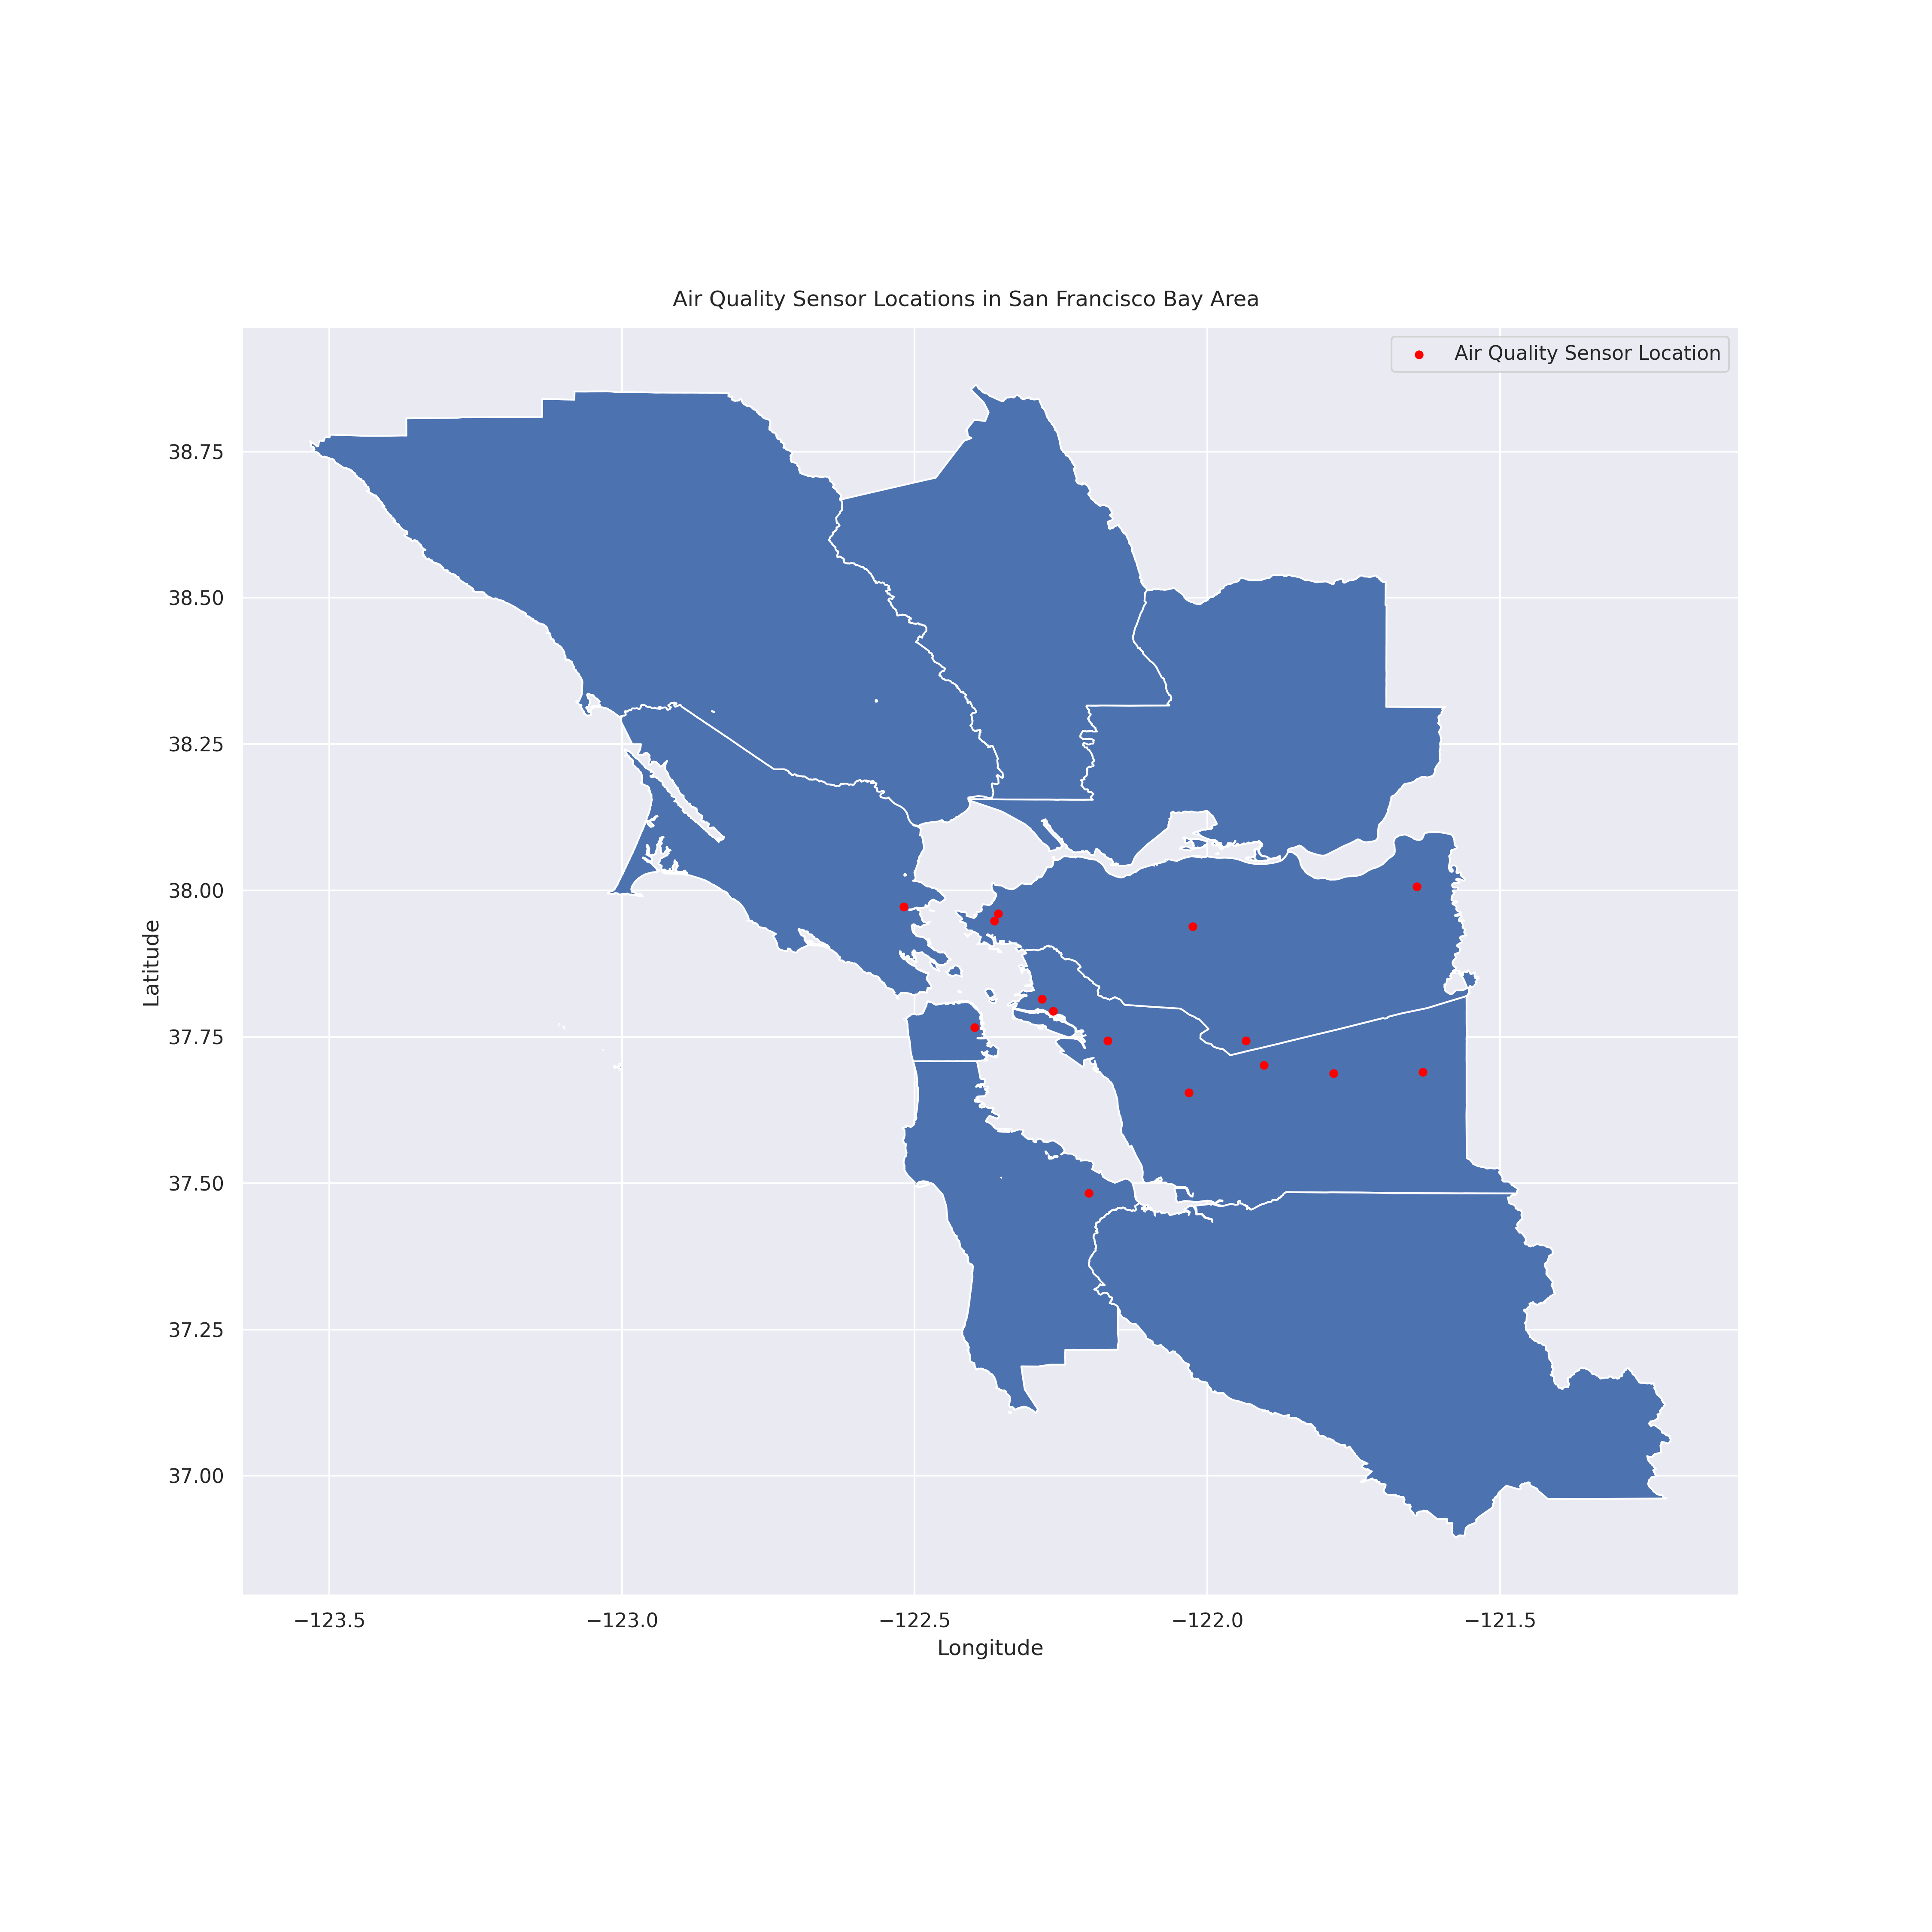

In [2]:
from IPython.display import Image; Image(filename = "figures/BAgeog.png", width=1000, height=1000)

Taking a look at data from the past week (5/3/2022 to 5/10/2022) in the Bay Area, we see the following statistical information about the parameters. Clearly, the fine particulate matter (PM<sub>2.5</sub>) exhibits the most variance. In the boxplots below it is even easier to see this variance. 

PM<sub>2.5</sub> can be particularly dangrous as it can cause short-term health effects such as eye, nose, and lung irritation, coughing, sneezing, and shortness of breath, and long-term exposure (months to years) has been [linked to premature death](https://nepis.epa.gov/Exe/ZyPDF.cgi/P100RQ5N.PDF?Dockey=P100RQ5N.PDF). Because of its importance in evaluating air quality indicators, PM<sub>2.5</sub> will be the focus of our exploration.

In [11]:
pd.read_pickle('data/weekstatsdf.pkl')

,min,25th percentile,median,mean,75th percentile,max
parameter,,,,,,
bc,0.020,0.090,0.200,0.244613,0.315,1.170
co,0.120,0.220,0.280,0.312877,0.370,0.790
no2,0.000,0.002,0.004,0.005016,0.006,0.036
o3,0.003,0.025,0.034,0.032220,0.039,0.063
pm25,-3.000,4.000,6.000,6.339687,8.000,43.000
so2,-0.001,0.000,0.000,0.000491,0.001,0.012


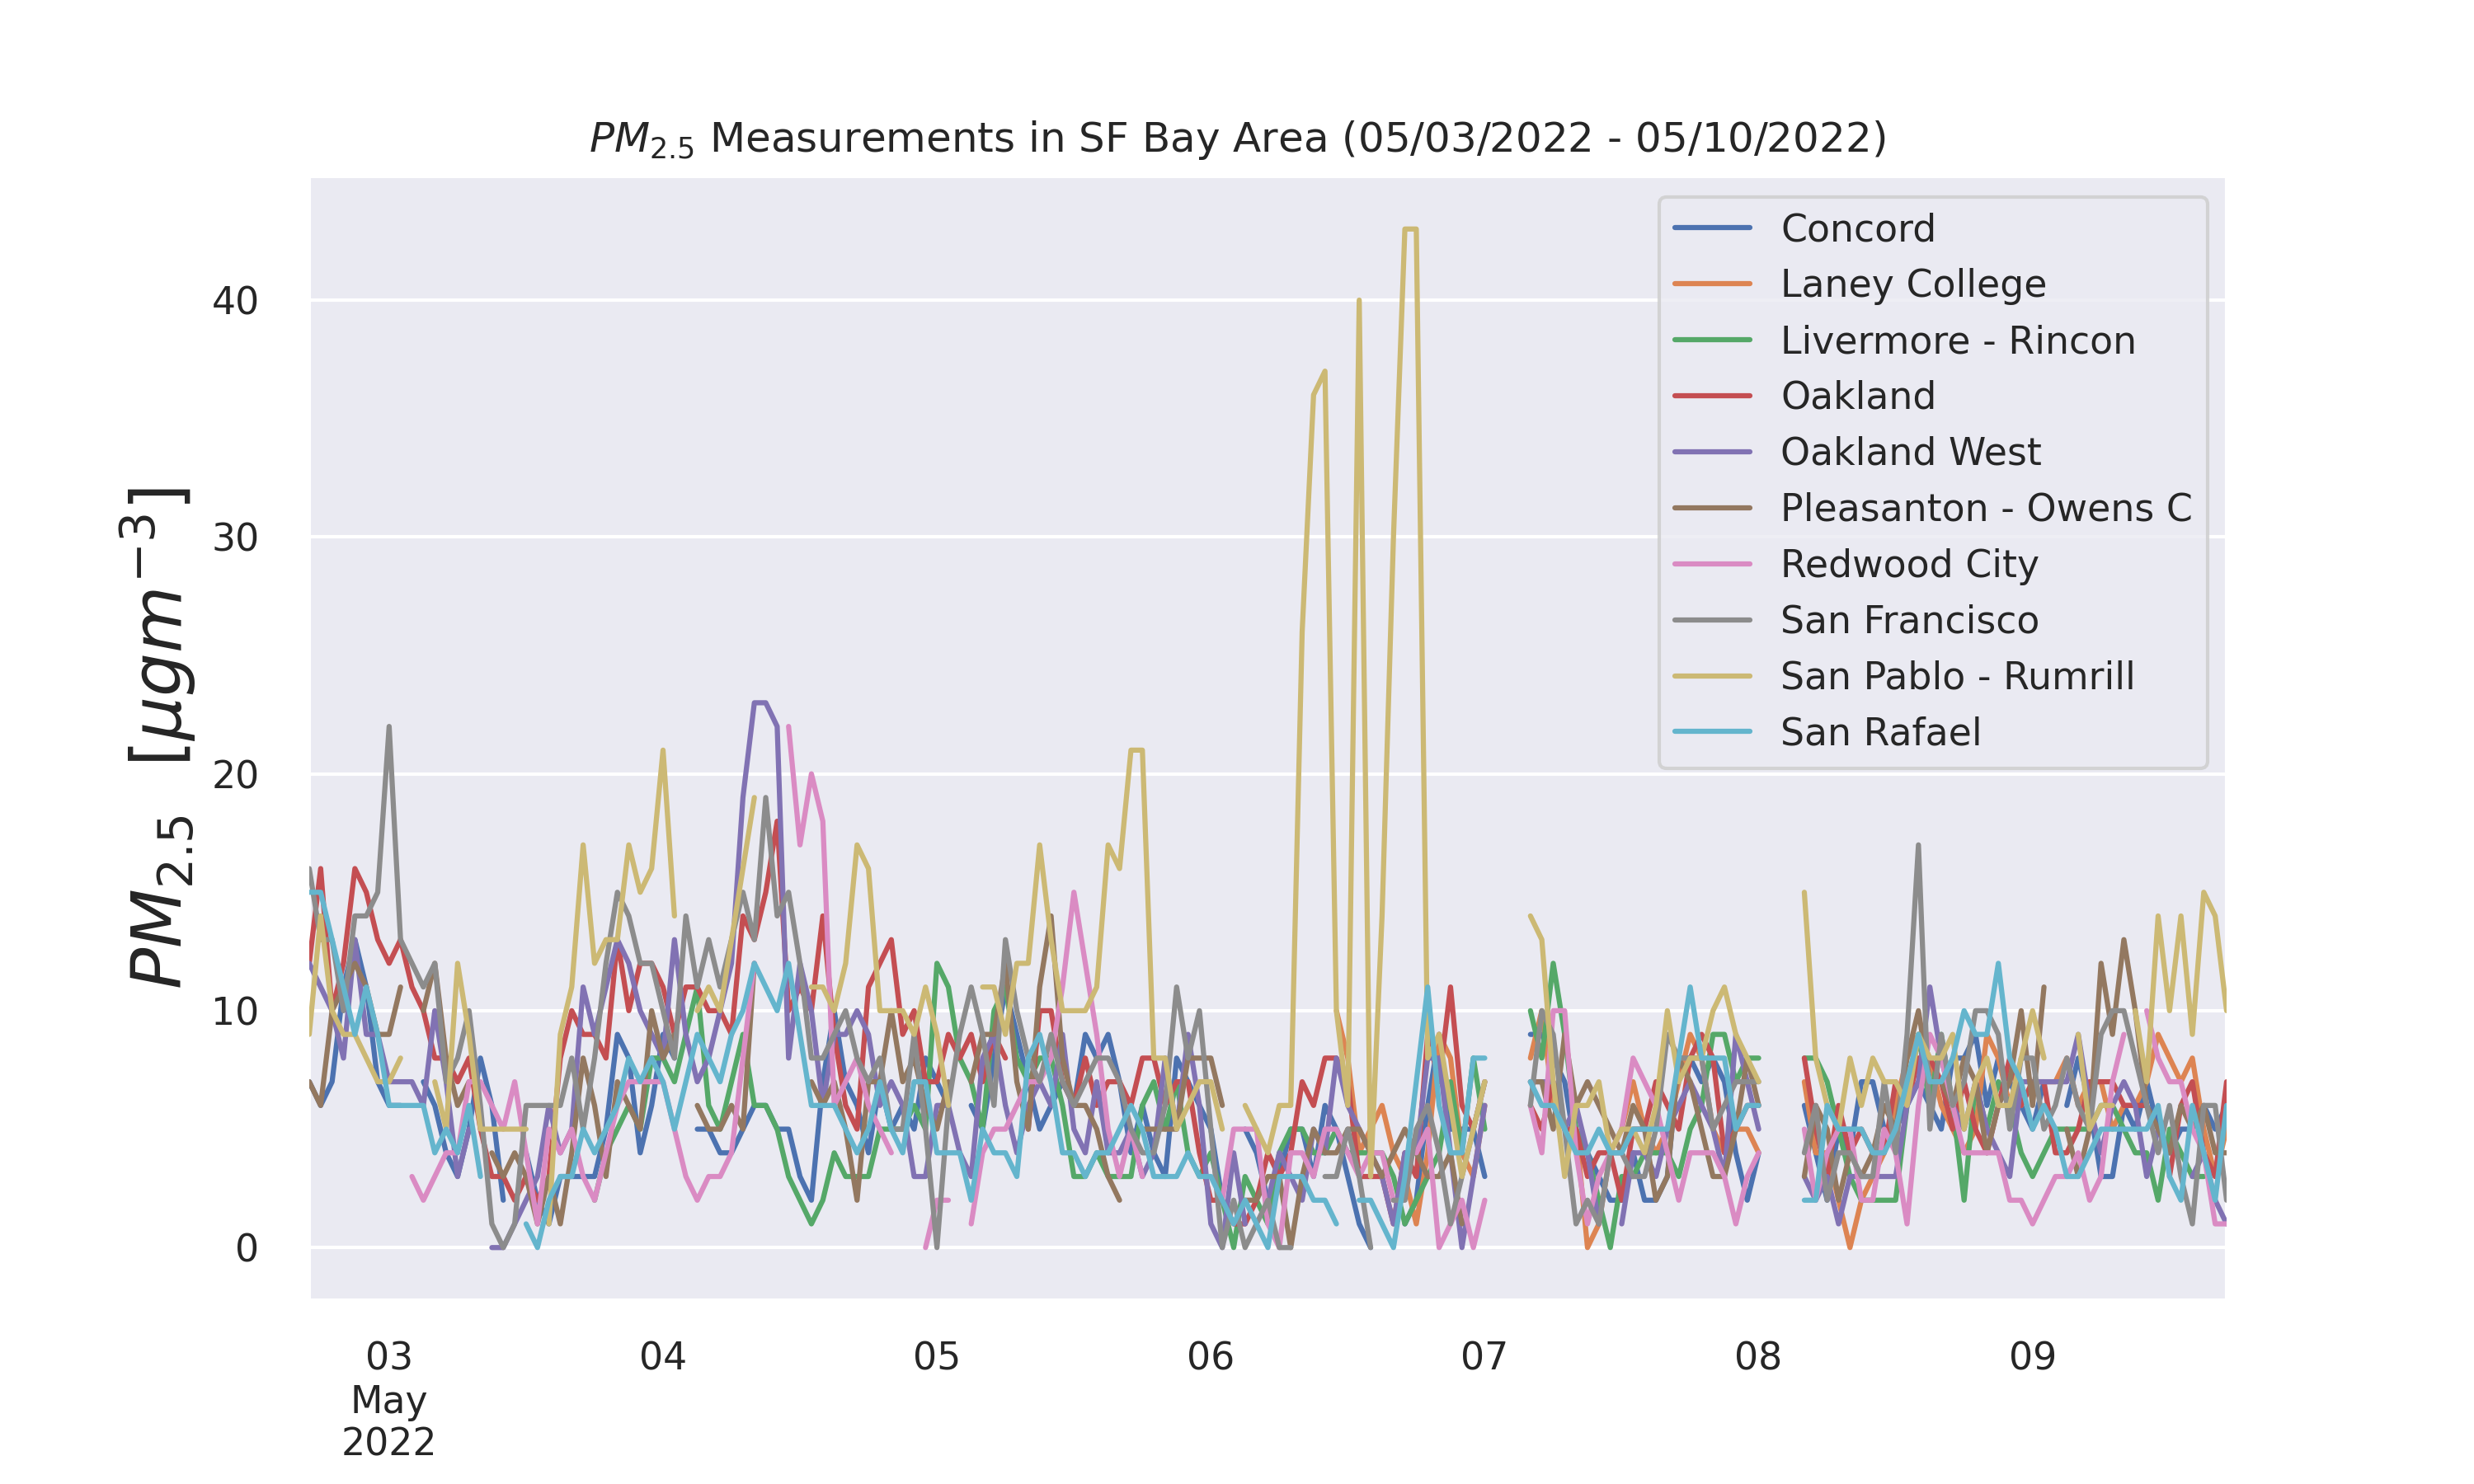

In [4]:
Image(filename = 'figures/PM25TSthisweek.png', width=1000, height=1000)

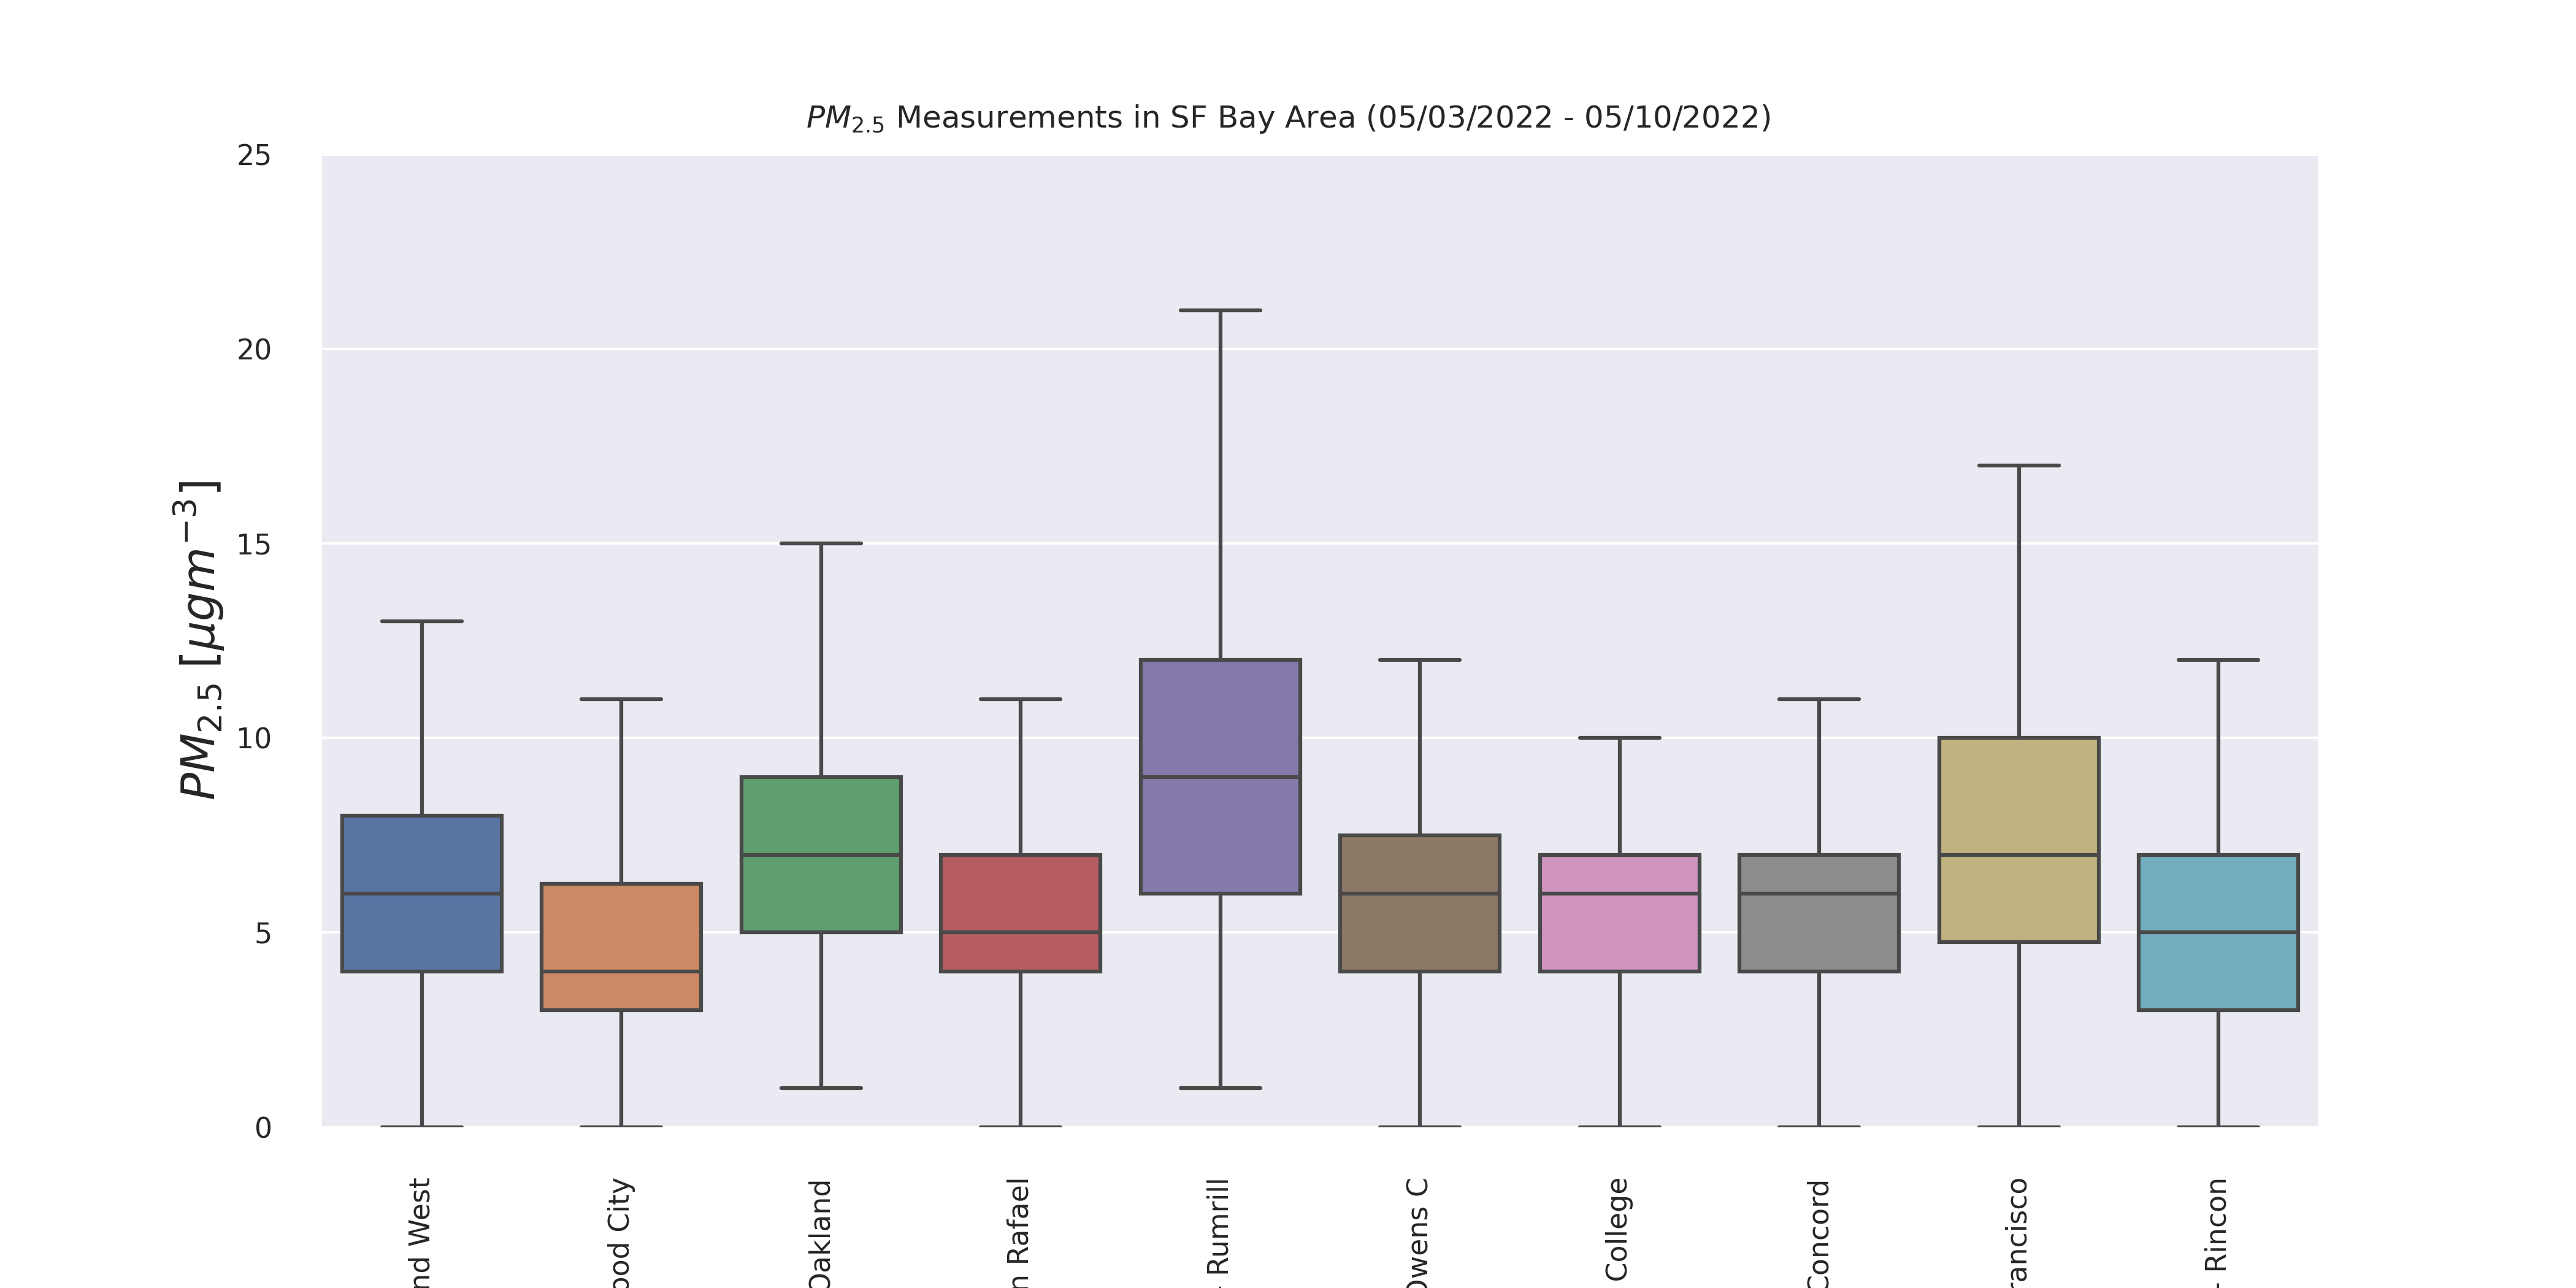

In [5]:
Image(filename = 'figures/PM25Boxthisweek.png', width=1000, height=1000)

The data for this past week is especially interesting when we consider it in the context of the days surrounding the "dark day" (September 9, 2020). The time series graph above with the peak PM<sub>2.5</sub> of 43 $\mu gm^{-3}$ seems high, but considering the peak during the wildfire period was greater than 200 $\mu gm^{-3}$ (as pictured below) it puts it in a new perspective.

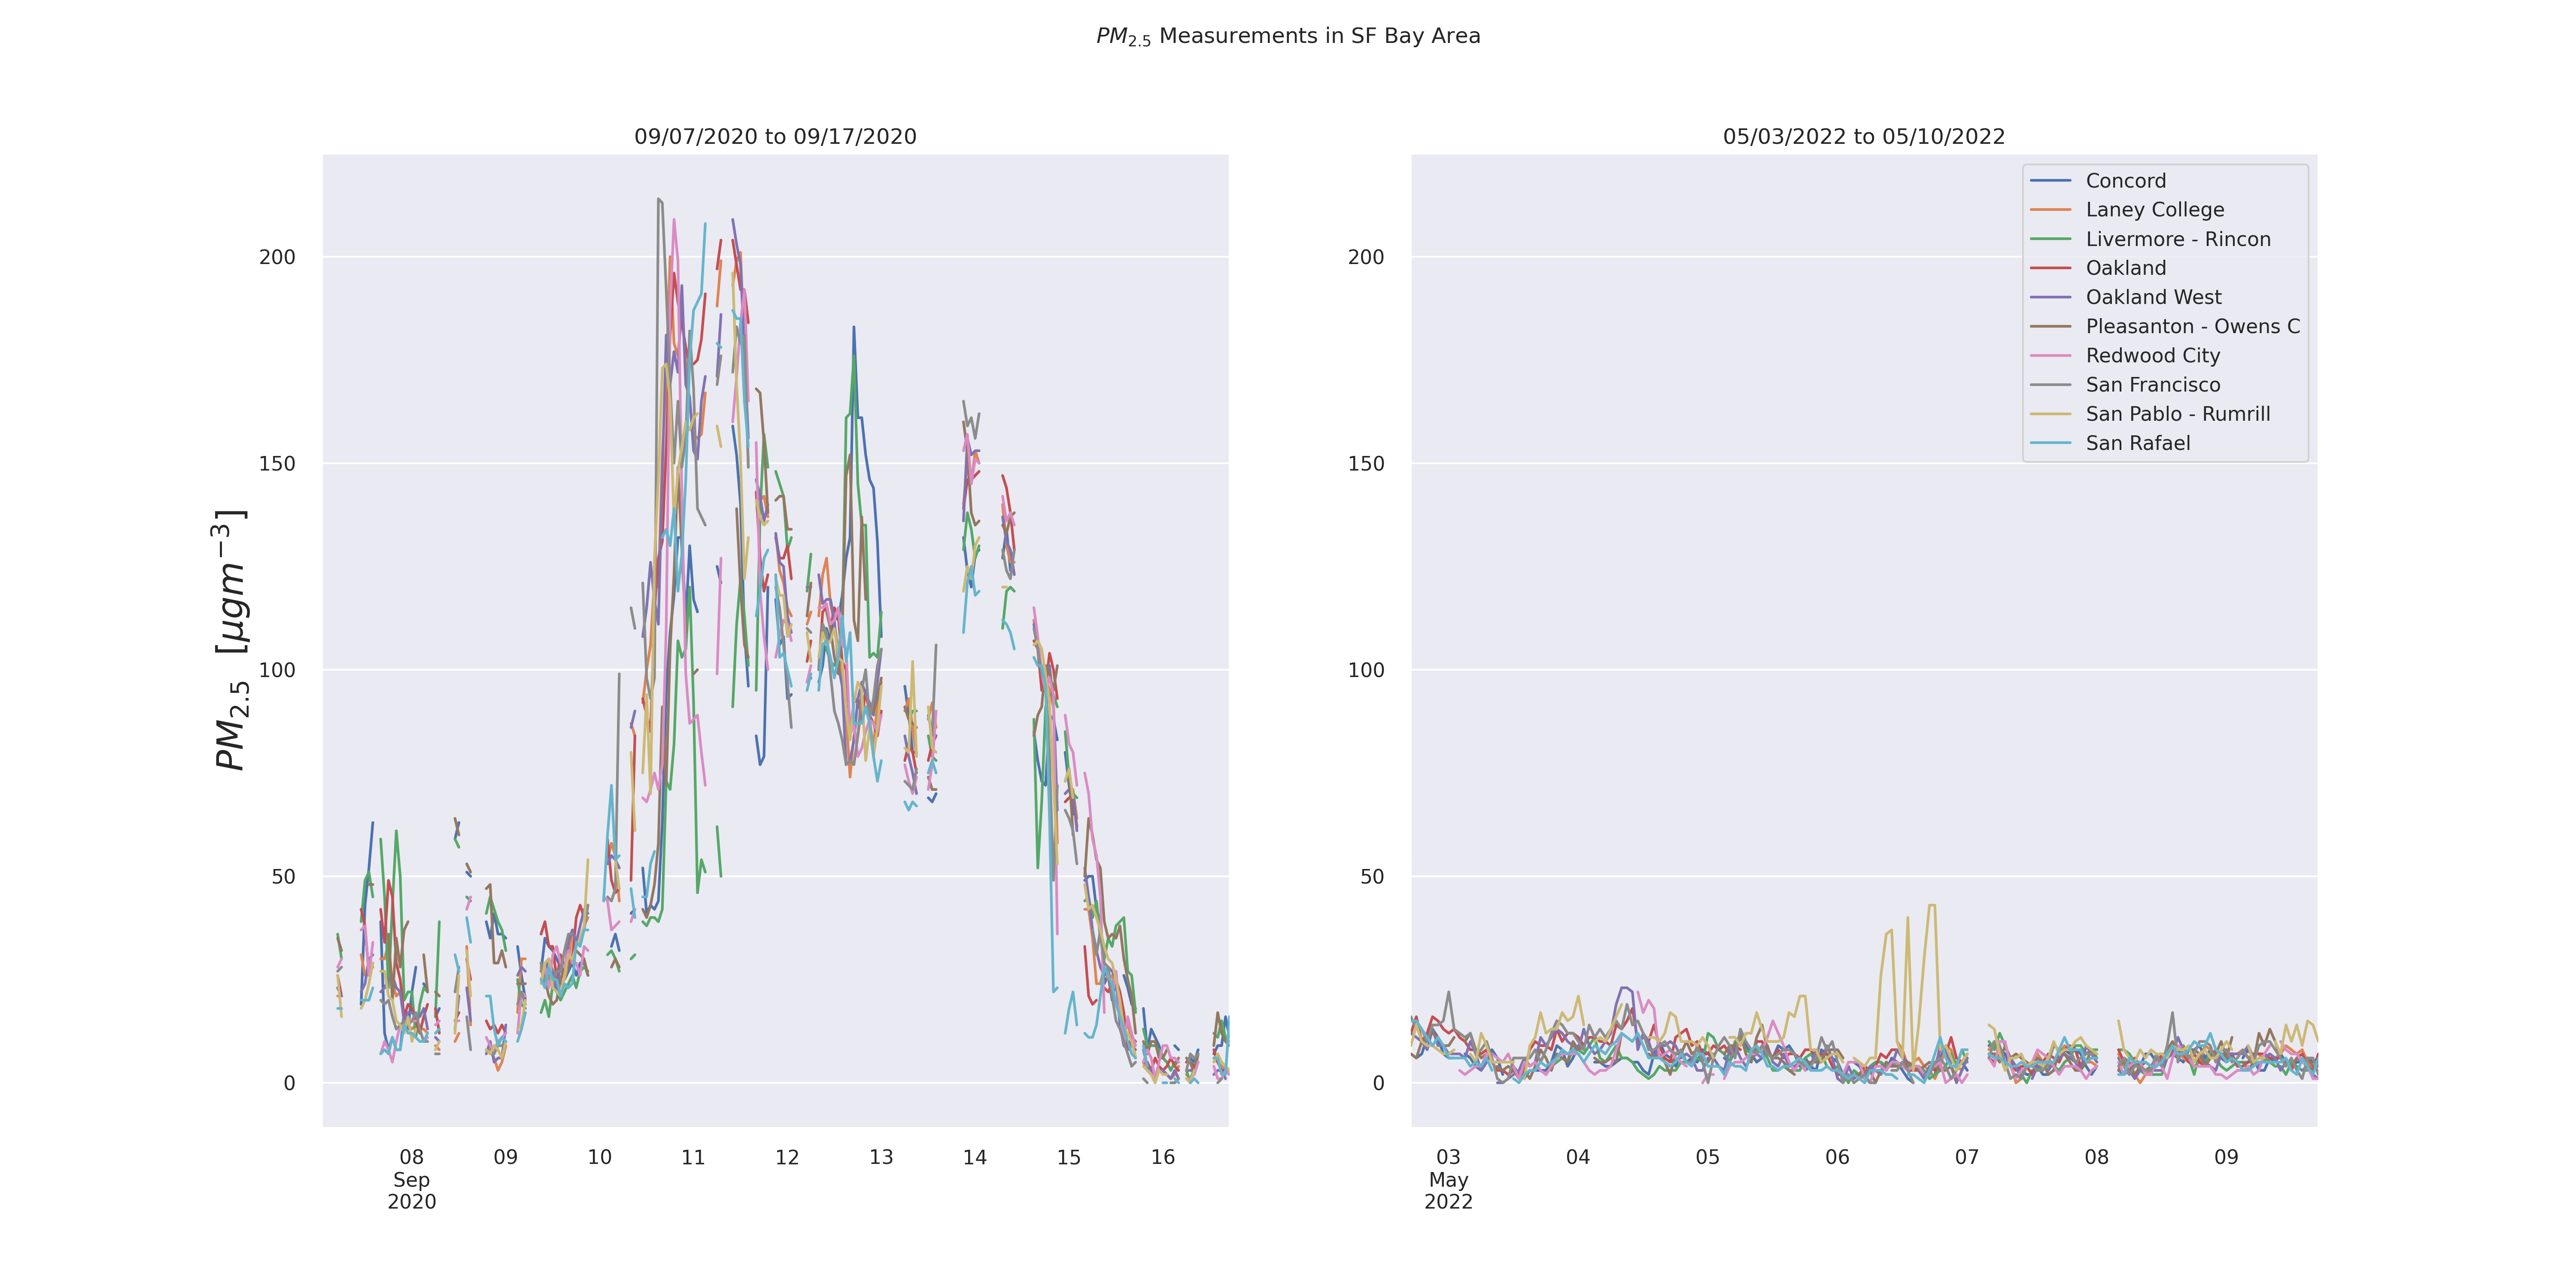

In [6]:
Image(filename = 'figures/PM25TScompare.png', width=1000, height=1000)

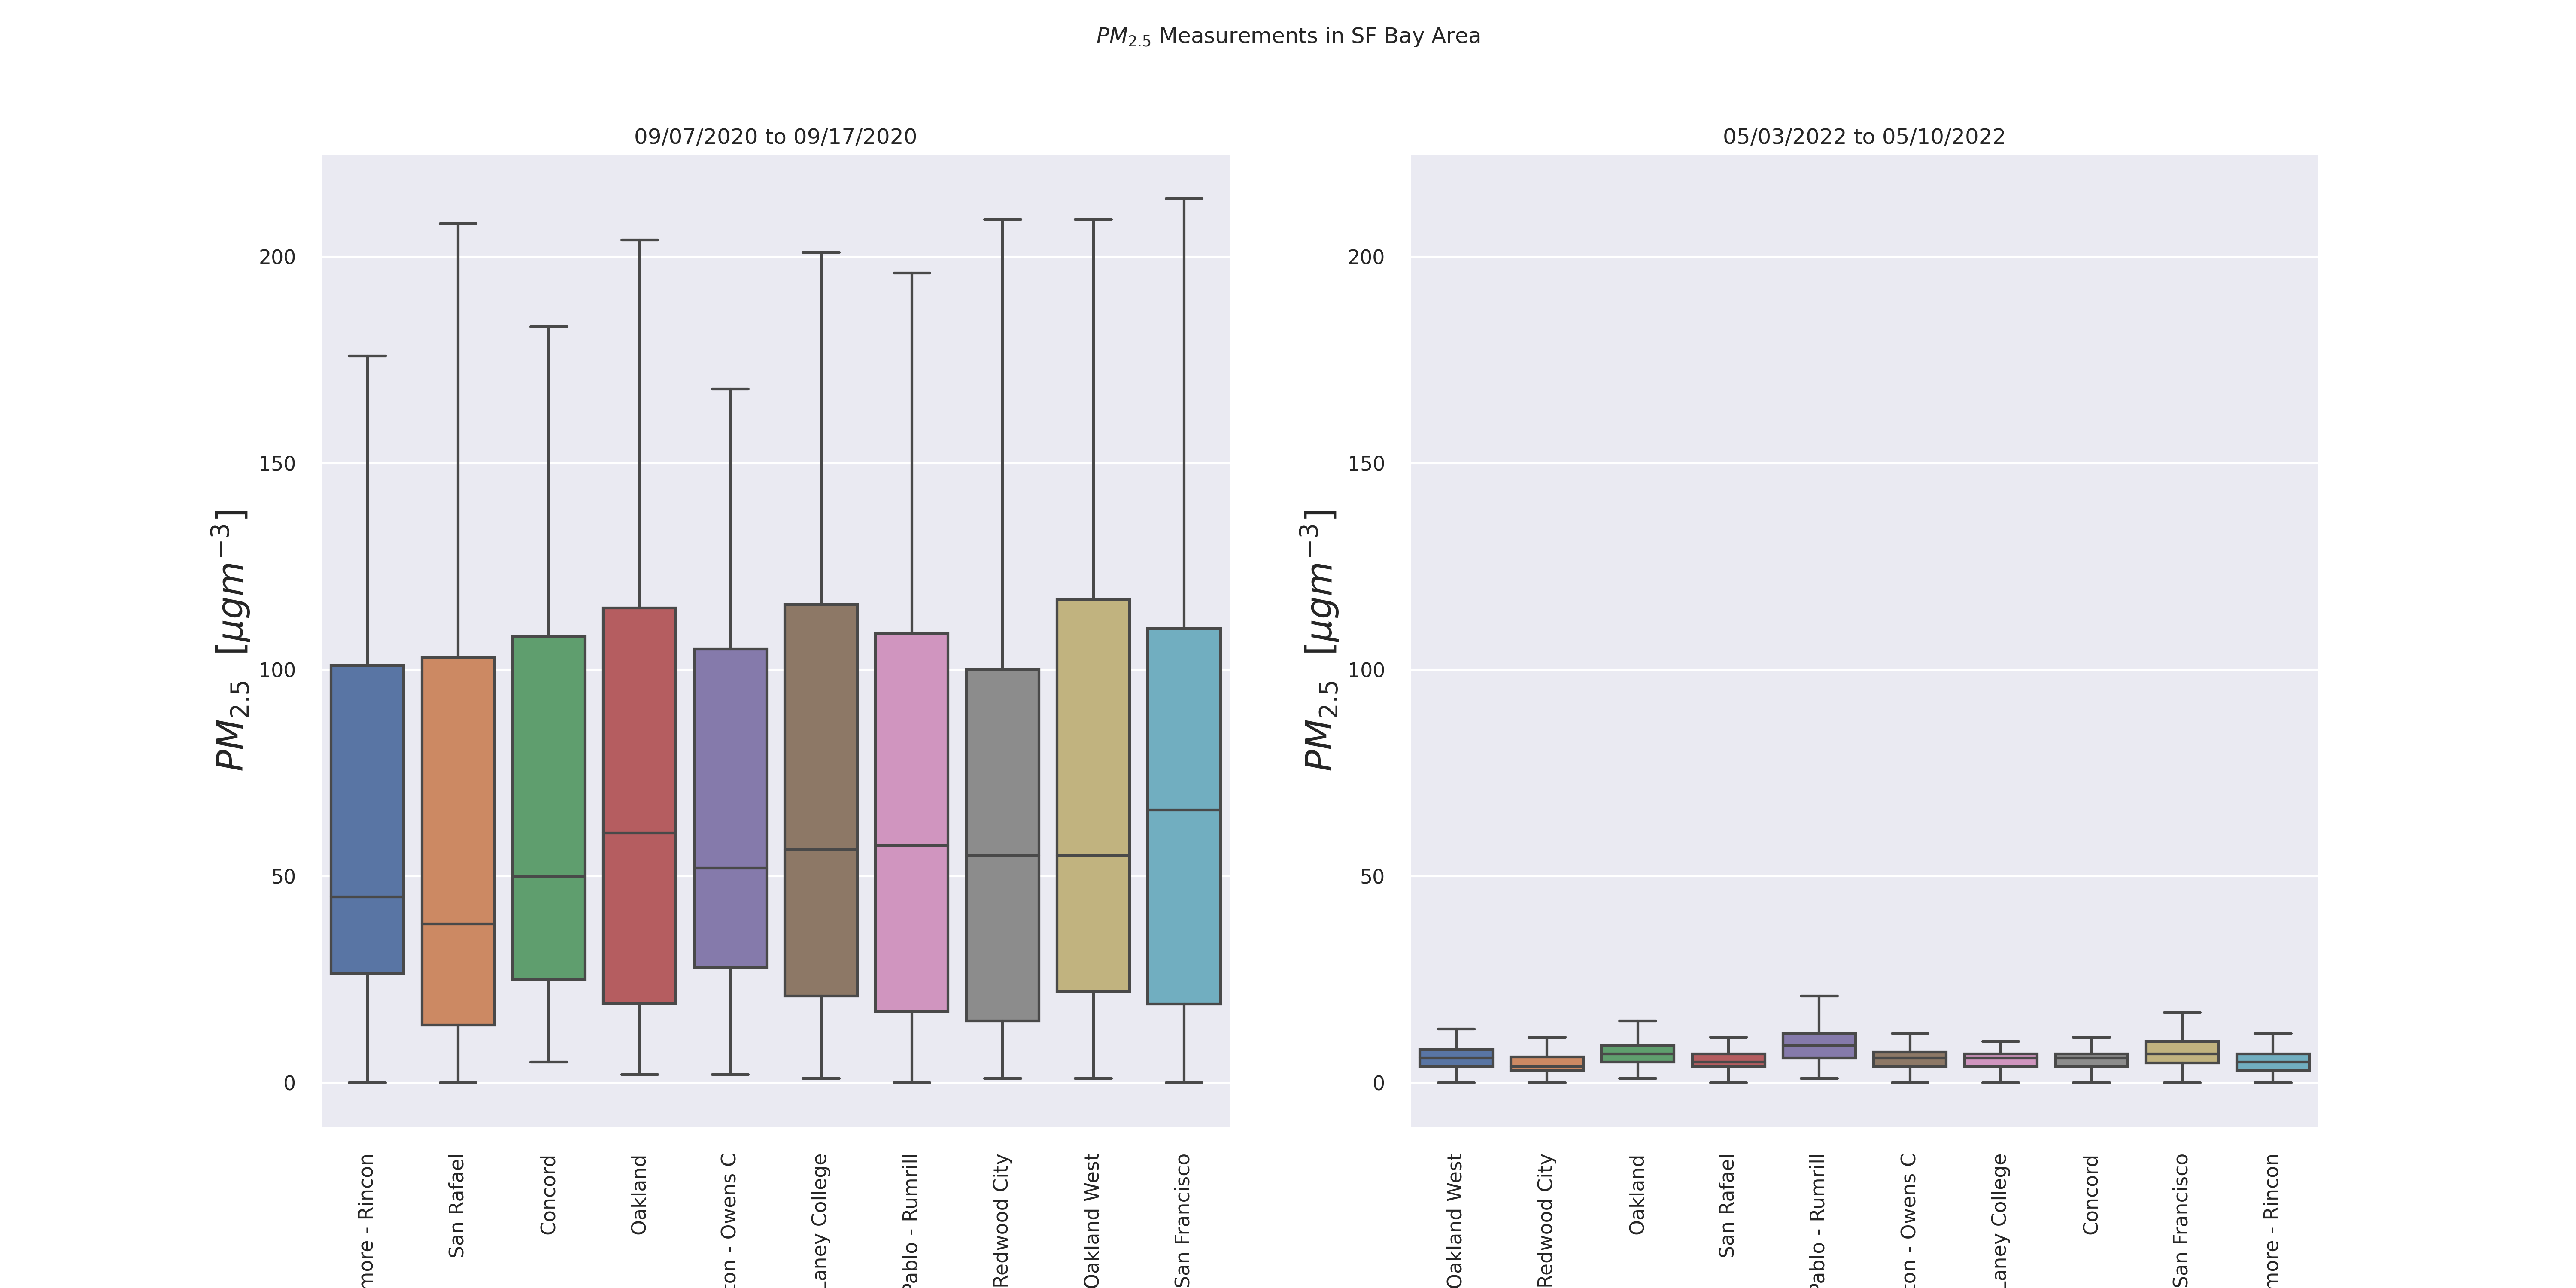

In [7]:
Image(filename = 'figures/PM25Boxcompare.png', width=1000, height=1000)

It is also interesting to see that the peak PM<sub>2.5</sub> during the wildfire period does *__not__* occur on the so-called "dark day" itself. This fact is made even more clear by focusing on one specific data sensor, that which is located in San Francisco and is operated by the Bay Area Air Quality Management District (BAAQMD). 

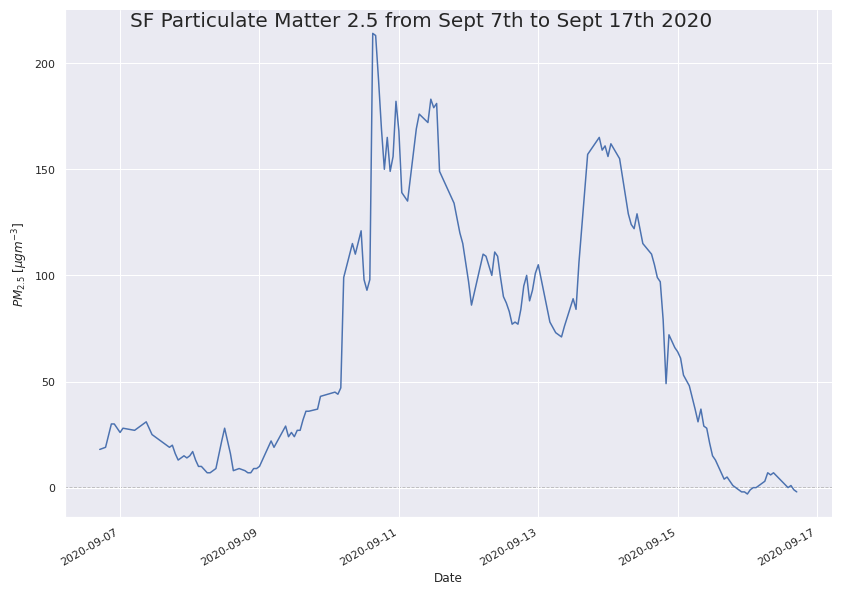

In [8]:
Image(filename = 'figures/SFTS.png', width=1000, height=1000)

Not only did the peak PM<sub>2.5</sub> occur a day or more after the "dark day" but that after falling from its peak, the particulate matter increased once again to nearly the same amount. This is interesting to learn for several reasons. First and foremost, there is a clear delay between when people on the ground "saw" their poor air quality and when the sensor "saw" the poor air quality. This is likely because on the "dark day" the particulates were likely high in the sky at a height much greater than that of the air quality sensors, which tend to be located either a few feet above the surface, or on the top of a building as pictured below. This is understandable, as the air quality sensors aim to provide air quality index (AQI) information about the air people will actually be breathing. Depending on the individual, however, one might heed air quality issues only when they can actually them. For example, a person on the "dark day" was likely to wear a facemask because the amount of air pollution they can see in the sky and would thus imagine they could be breathing it in on the ground (as well as because of the COVID-19 pandemic). On the otherhand, a couple of days after the dark day, when the sky appears more visible, but the ground-level air quality is actually lower, could lead to individuals being outside without a face mask because they cannot "see" the poor air quality themselves. Though this challenge is beyond the scope of this analysis, it is an interesting predicament.

 <center><img src="https://ww2.arb.ca.gov/sites/default/files/styles/list/public/images/AirMonitoring-20.jpg?h=180281fb&itok=ypZzf_Vf" width="350" height="350" /></center>
 
The second interest aspect of this finding is the fact that, several days after the "dark day" the air quality seemingly returns back to normal. This begs the question -- **What happened to the poor quality air? Did it settle on the ground in the Bay Area, or did wind/air currents carry it to a different part of the Bay Area (or even a different part of California)?** This will the be the focus of the visualization section of this write-up. 

The full code for the Data Exploration section can be found in the [ExplorationAndVisualization.ipynb Jupyter Notebook](ExplorationAndVisualization.ipynb).

## Visualization of SF Bay Area Air Quality During Wildfire Period (09/07/2020 to 09/17/2020) ##

To visualize the air quality of the San Francisco Bay Area during the wildfire period, we can start by looking at the PM<sub>2.5</sub> at each sensor location. We can see in the gif below that the particulates seem to move into San Francisco on the 9th, reach their peak at the 10th, move towards the East Bay with a peak there by the 12th, before moving back towards San Francisco by the 13th for a second peak, before dissipating in the entire Bay Area by the 16th. 

<center><img src="figures/simpletimelapsegif.gif" width="750" height="750" /></center>

We can refine this visualization by increasing the time steps from daily to hourly point measurements, and interpolating between points to form smooth contours. For the purposes of this visualization, we assume a linear interpolation between spatial and temporal points (when data at specific sensors was not available. From this new visualization, we can see the effects air currents have on the particulate measurements throughout the day. Once again, we see the particulates move in from the east, however in this new visualization, we can see that the particulates move from the San Francisco Peninsula to the South Bay towards the end of the day of the 11th. The particulates then move back north to San Francisco and the Berkeley/Oakland part of the East Bay before continuing east where it dissipates.

<img src="figures/timelapsegif.gif" width="750" height="750" />

In the above visualization, we see the particulates move towards the South and East parts of the Bay Area after the initial peak near San Francisco. To see how the rest of the State of California was potentiall impacted by the particulates, we expand our visualization to include the rest of the state, as well as sensors in nearby states (e.g., Las Vegas). Several attempts were made to pull data for the entire United States to see the potential nation-wide impacts of the wildfire-related low air quality, however the API became throttled from too many consecutive requests.

<center><img src="figures/CAtimelapsegif.gif" width="750" height="750" /></center>

Unfortunately, due to the lack of granularity in the data, the missing areas created from missing datapoints for multiple days, and the requisite linear interpolation between points, it is difficult to perceive specific patterns in the changes in air quality for the State during the period of analysis. One key reason for this is the tragic and unfortunate fact that [numerous wildfires were occuring simultaneously](https://www.fire.ca.gov/incidents/2020/) in multiple parts of the State during the period of analysis. This is an interesting unintended feature of this visualization -- that you can visualize where wildfires were located around the State and their multiple areas of influence.

The full code for creating the animations for the Data Visualization section can be found in the [ExplorationAndVisualization.ipynb Jupyter Notebook](ExplorationAndVisualization.ipynb).

## Analysis I: Prediction of Future "Dark Days" ##

Fill in w/ Ram's material

## Analysis II: Report from Gyuhyeon ##

Text

## Conclusion ##

Throughout this report, we have analyzed the Bay Area air quality data from September 7th to 17th of 2020, dates surrounding the "dark day" that covered the skies with an orange tint on September 9th. We were able to see that compared to normal air quality trends evident in the May 2022 air quality data, the PM2.5 within the date range in September 2020 was significantly higher. An interesting observation is that the peak PM2.5 occurred a day or more after the "dark day", indicating that there was a discrepancy between sensors' detection of air quality and people's visibility of air quality.

We also created several visualizations of the SF Bay Area air quality in September 2020, which show the movement of particulates throughout the region over time. One limitation of these visualizations is the lack of granularity in the data, which has made it difficult to examine specific patterns in the changes in air quality.

Following exploration and visualizations, we wanted to determine if the orange skies were a predictable occurrence, using PM2.5 and CO concentration data. We first used a linear model to fill in the missing values in the CO concentration dataset.

## Author Contributions ##

Wesley Darling: ExplorationAndVisualization.ipynb, viz_utils.py, test_viz_utils.py, environment.yml, Makefile, README.md, Main.ibynb